# CMSE 201 Final - Alice Shirley

#### CMSE 201 Final Project
### &#9989; Section_003
#### &#9989; 12/03/2023

# ___What makes a Good NBA Rookie?___

## Background and Motivation

The National Basketball Association (NBA) is a professional basketball league in North America. Basketball is a sport which turns out new players quite freuqently. In a sport so ruthless, how can it be determined who will last?

The following data from Kaggle consists of performance statistics from a player's rookie (first) year. There are 1,341 observations. The variables in this dataset are 'Name', 'Games_Played', 'MinPlayed','AvgPts', 'FGPerc', '3PPerc','FTPerc', 'AvgORebs', 'AvgDRebs', 'AvgAssists', 'AvgSteals', 'AvgBlocks', 'AvgTovs' and 'Target5yrs'.  The target variable is a Boolean which indicates if a player will last in the league for five years. A 0 means they do not last, while a 1 indicates they do. 

My goal is to determine what statistics are most indicitive of whether a rookie will go on to be in the league for an extended period of time (more than 5 yrs). 

## Methodology

##### 1. Clean Data:
I removed the columns for field goal attempts, field goals made, 3 point attempts, 3 point attempts made, free throw attempts, and free throws made. These figures were already expressed as a percentages. It would be redundant to include this data percentages which are better for comparison between players. 

I renamed the columns to be more clear and made seperate data frames for rookies that went on to have a career longer than 5 yrs vs those that didn't. 

In [1]:
#import packages 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#removing fga, fgm, 3pa, 3p_made, fta, ftm 
rookies = pd.read_csv('nba.csv', delimiter = ',', usecols = (1,2,3,4,7,10,13,14,15,17,18,19,20,21))

#renaming columns
rookies.columns = ['Name', 'Games_Played', 'MinPlayed','AvgPts', 'FGPerc', '3PPerc','FTPerc', 'AvgORebs', 'AvgDRebs', 'AvgAssists', 'AvgSteals', 'AvgBlocks', 'AvgTovs', 'Target5yrs']

#dataframe of players that had a career less than 5 yrs
mask1 = (rookies["Target5yrs"]) == 0
under5 = rookies[mask1]

#dataframe of players that had a career greater than 5yrs
mask2 = (rookies["Target5yrs"]) == 1
over5 = rookies[mask2]

rookies

,Name,Games_Played,MinPlayed,AvgPts,FGPerc,3PPerc,FTPerc,AvgORebs,AvgDRebs,AvgAssists,AvgSteals,AvgBlocks,AvgTovs,Target5yrs
0,Brandon Ingram,36,27.4,7.4,34.7,25.0,69.9,0.7,3.4,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,29.6,23.5,76.5,0.5,2.0,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,42.2,24.4,67.0,0.5,1.7,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,42.6,22.6,68.9,1.0,0.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,52.4,0.0,67.4,1.0,1.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,43.3,14.3,79.2,0.4,0.8,2.5,0.6,0.2,0.8,0
1336,Brent Price,68,12.6,3.9,35.8,16.7,79.4,0.4,1.1,2.3,0.8,0.0,1.3,1
1337,Marlon Maxey,43,12.1,5.4,55.0,0.0,64.3,1.5,2.3,0.3,0.3,0.4,0.9,0
1338,Litterial Green,52,12.0,4.5,43.9,10.0,62.5,0.2,0.4,2.2,0.4,0.1,0.8,1


##### 2. Overview of Data
I created boxplots to represent spread of data & a correlation chart to show the relationships between variables 

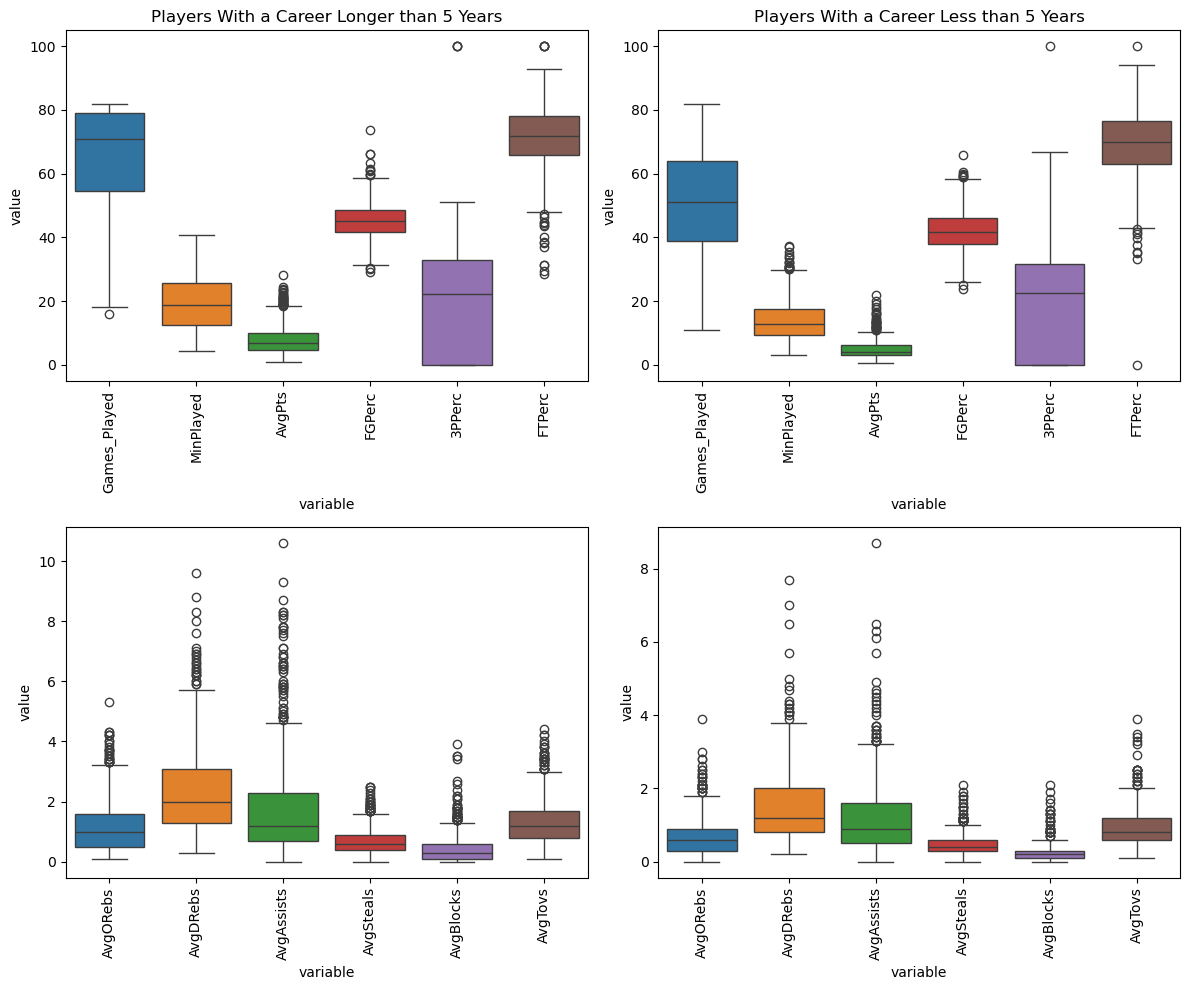

In [5]:
plt.figure(figsize=(12, 10))
#plot for players that had a career over 5 years
plt.subplot(2,2,1)
#drop name and target so there is the purely quantitative data
over = over5.drop(['Name', 'Target5yrs', 'AvgORebs', 'AvgDRebs', 'AvgAssists', 'AvgSteals', 'AvgBlocks', 'AvgTovs'], axis=1)
sns.boxplot(x="variable", y="value", data = pd.melt(over), hue = 'variable', legend = False)
plt.xticks(rotation = 90) 
plt.title('Players With a Career Longer than 5 Years')

#plot for players that had a career less than years
plt.subplot(2,2,2)
#drop name and target so there is the purely quantitative data
under = under5.drop(['Name', 'Target5yrs', 'AvgORebs', 'AvgDRebs', 'AvgAssists', 'AvgSteals', 'AvgBlocks', 'AvgTovs'], axis=1)
sns.boxplot(x="variable", y="value", data = pd.melt(under), hue = 'variable', legend = False)
plt.xticks(rotation = 90) 
plt.title('Players With a Career Less than 5 Years')

#plot for players that had a career over 5 years
plt.subplot(2,2,3)
over2 = over5.drop(['Name', 'Target5yrs','Games_Played', 'MinPlayed', 'AvgPts', 'FGPerc', '3PPerc', 'FTPerc'], axis=1)
sns.boxplot(x="variable", y="value", data = pd.melt(over2), hue = 'variable', legend = False)
plt.xticks(rotation = 90) 


#plot for players that had a career less than years
plt.subplot(2,2,4)
under2 = under5.drop(['Name','Target5yrs','Games_Played', 'MinPlayed', 'AvgPts', 'FGPerc', '3PPerc', 'FTPerc'], axis=1)
sns.boxplot(x="variable", y="value", data = pd.melt(under2), hue = 'variable', legend = False)
plt.xticks(rotation = 90) 


plt.tight_layout()


In [6]:
#correlation matrix
#drop name and target5yrs because they aren't quantitative 
cdf = rookies.drop(['Name', 'Target5yrs'], axis=1)
cdf.corr(method='pearson', min_periods=1, numeric_only= True)

,Games_Played,MinPlayed,AvgPts,FGPerc,3PPerc,FTPerc,AvgORebs,AvgDRebs,AvgAssists,AvgSteals,AvgBlocks,AvgTovs
Games_Played,1.000000,0.590240,0.538471,0.296289,0.037133,0.196299,0.401136,0.466840,0.372749,0.451137,0.276498,0.518167
MinPlayed,0.590240,1.000000,0.911822,0.203901,0.168070,0.239878,0.573062,0.745513,0.629015,0.757034,0.399088,0.826500
AvgPts,0.538471,0.911822,1.000000,0.255333,0.154955,0.258931,0.575106,0.693934,0.552338,0.675341,0.387043,0.850366
FGPerc,0.296289,0.203901,0.255333,1.000000,-0.336502,-0.161183,0.511367,0.410555,-0.108797,0.056658,0.391626,0.121806
3PPerc,0.037133,0.168070,0.154955,-0.336502,1.000000,0.332458,-0.289399,-0.125716,0.266898,0.198237,-0.246358,0.111495
FTPerc,0.196299,0.239878,0.258931,-0.161183,0.332458,1.000000,-0.146786,-0.022905,0.296315,0.207205,-0.161152,0.199742
AvgORebs,0.401136,0.573062,0.575106,0.511367,-0.289399,-0.146786,1.000000,0.838580,-0.012109,0.286545,0.648346,0.421695
AvgDRebs,0.466840,0.745513,0.693934,0.410555,-0.125716,-0.022905,0.838580,1.000000,0.186679,0.411894,0.688135,0.570187
AvgAssists,0.372749,0.629015,0.552338,-0.108797,0.266898,0.296315,-0.012109,0.186679,1.000000,0.751289,-0.086470,0.747286
AvgSteals,0.451137,0.757034,0.675341,0.056658,0.198237,0.207205,0.286545,0.411894,0.751289,1.000000,0.133808,0.741988


In [7]:
#Items with highest correlation from matrix: verifying 
print(rookies['AvgPts'].corr(rookies['MinPlayed']))
print(rookies['AvgTovs'].corr(rookies['AvgPts']))
print(rookies['AvgORebs'].corr(rookies['AvgDRebs']))

0.9118223757042105
0.8503663081506762
0.8385797201433457


<Axes: >

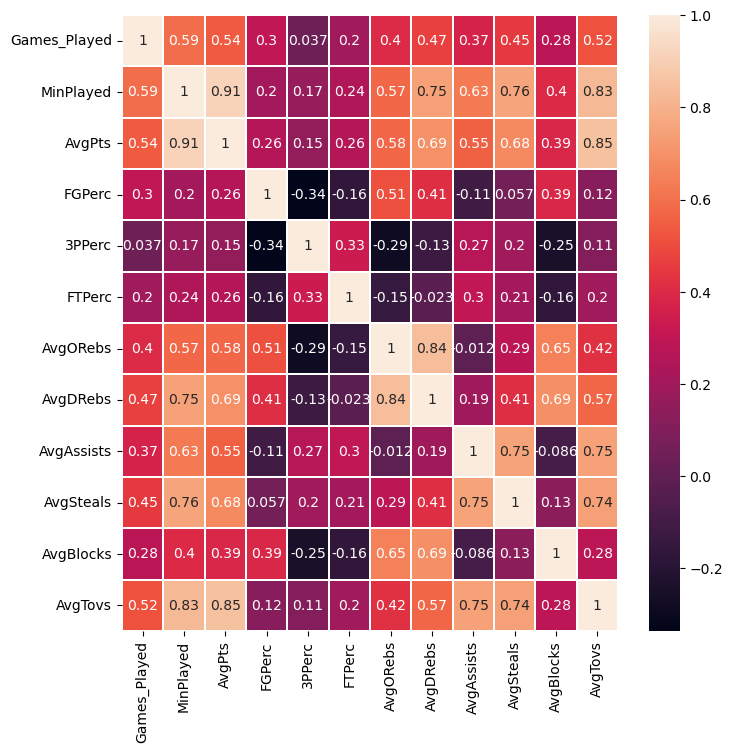

In [8]:
#another way of showing prev. information
plt.figure(figsize=(8, 8))
sns.heatmap(cdf.corr(), annot=True, linewidths=.2)

##### 3. Explore data Further Based on Previous Findings 
Based on the boxplots, it appears Gamees Played & Average Points per game differ the most between the two datafames. 

0.628995160285591


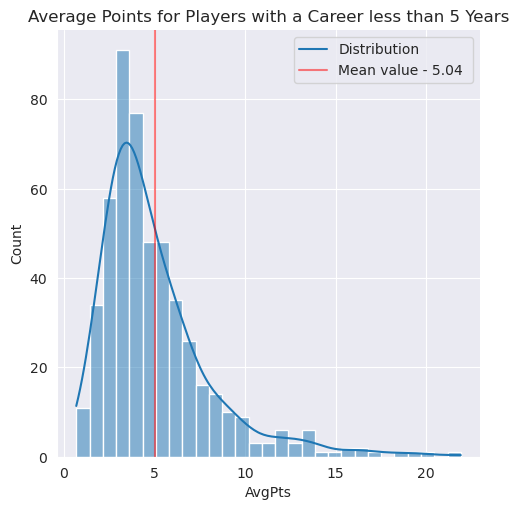

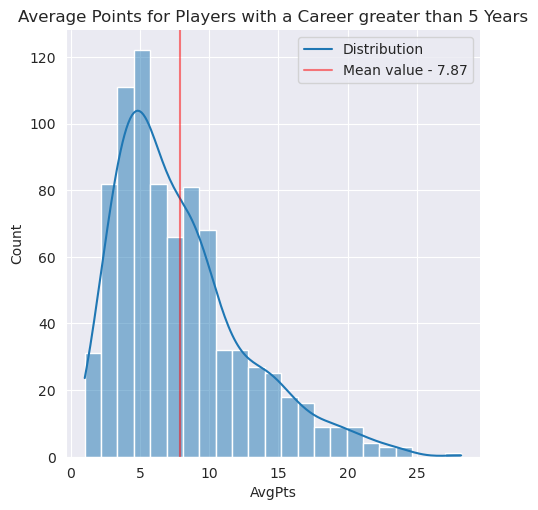

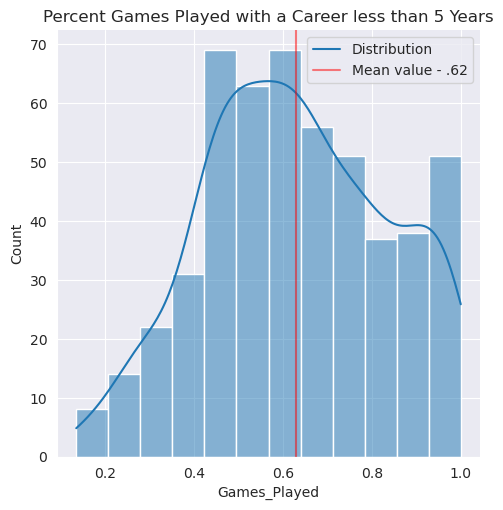

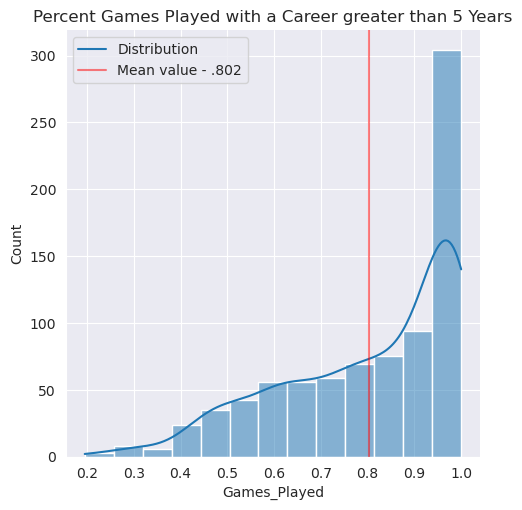

In [26]:
#histogram for avg.pts for under5
sns.displot(under5, x="AvgPts", kde=True)
plt.axvline(x = np.mean(under5['AvgPts']), linestyle = '-', alpha = .5, color = 'red')
plt.title('Average Points for Players with a Career less than 5 Years')
plt.legend(['Distribution','Mean value - 5.04 '])

#histogram for avg.pts for over5
sns.displot(over5, x="AvgPts", kde=True)
plt.axvline(x = np.mean(over5['AvgPts']), linestyle = '-', alpha = .5, color = 'red')
plt.title('Average Points for Players with a Career greater than 5 Years')
plt.legend(['Distribution','Mean value - 7.87'])

#Histogram for Games Played for under5
GPPerc1 = under5['Games_Played']/82
sns.displot(under5, x= GPPerc1, kde=True)
plt.axvline(x = np.mean(GPPerc1), linestyle = '-', alpha = .5, color = 'red')
plt.title('Percent Games Played with a Career less than 5 Years')
plt.legend(['Distribution','Mean value - .62'])
print(np.mean(GPPerc1))



#Histogram for Games Player over5
GPPerc2 = over5['Games_Played']/82
sns.displot(over5, x=GPPerc2, kde=True)
plt.axvline(x = np.mean(GPPerc2), linestyle = '-', alpha = .5, color = 'red')
plt.title('Percent Games Played with a Career greater than 5 Years')
plt.legend(['Distribution','Mean value - .802'])

In [21]:
print(under5['AvgPts'].describe())
print(over5['AvgPts'].describe())
print(GPPerc1.describe())
print(GPPerc2.describe())

count    509.000000
mean       5.042829
std        3.112164
min        0.700000
25%        3.100000
50%        4.100000
75%        6.100000
max       21.900000
Name: AvgPts, dtype: float64
count    831.000000
mean       7.878700
std        4.652551
min        1.000000
25%        4.500000
50%        6.800000
75%       10.100000
max       28.200000
Name: AvgPts, dtype: float64
count    509.000000
mean       0.628995
std        0.207142
min        0.134146
25%        0.475610
50%        0.621951
75%        0.780488
max        1.000000
Name: Games_Played, dtype: float64
count    831.000000
mean       0.802765
std        0.187559
min        0.195122
25%        0.664634
50%        0.865854
75%        0.963415
max        1.000000
Name: Games_Played, dtype: float64


##### 3. Explore Correlations
Create Plots to compare the relationships between the factors with strong correlations for the under5 and over5 data

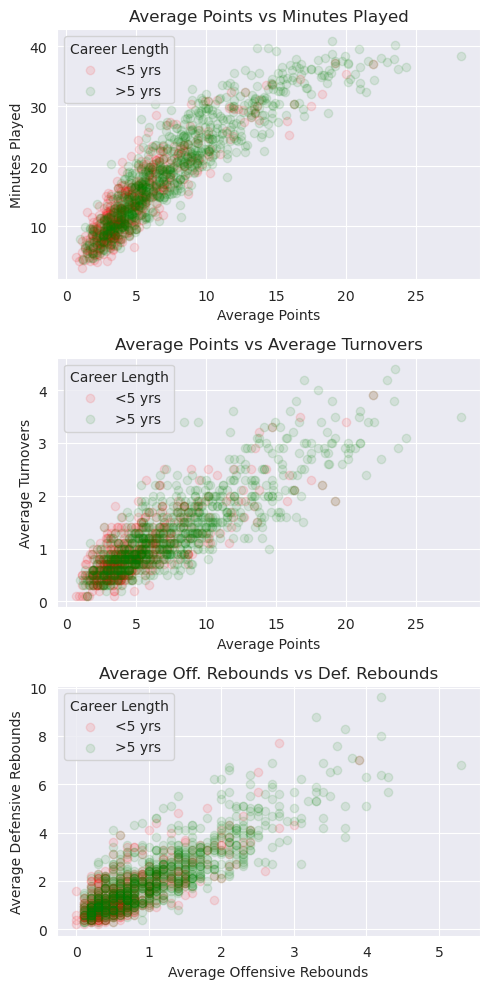

In [23]:
plt.figure(figsize=(5, 10))
sns.set_style("darkgrid")

#Avgpts vs Min Played     
plt.subplot(3,1,1)
plt.scatter(under5["AvgPts"], under5['MinPlayed'], color = 'red', alpha = .1)
plt.scatter(over5["AvgPts"], over5['MinPlayed'], color = 'green', alpha =.1)
plt.xlabel('Average Points')
plt.ylabel('Minutes Played')
plt.title('Average Points vs Minutes Played')
plt.legend(['<5 yrs', '>5 yrs'], title = 'Career Length')

#Avgpts vs Avg Tovs
plt.subplot(3,1,2)
plt.scatter(under5["AvgPts"], under5['AvgTovs'], color = 'red', alpha = .1)
plt.scatter(over5["AvgPts"], over5['AvgTovs'], color = 'green', alpha =.1)
plt.xlabel('Average Points')
plt.ylabel('Average Turnovers')
plt.title('Average Points vs Average Turnovers')
plt.legend(['<5 yrs', '>5 yrs'], title = 'Career Length')
 
#AvgOrebs vs drebs
plt.subplot(3,1,3)
plt.scatter(under5["AvgORebs"], under5['AvgDRebs'], color = 'red', alpha = .1)
plt.scatter(over5["AvgORebs"], over5['AvgDRebs'], color = 'green', alpha =.1)
plt.xlabel('Average Offensive Rebounds')
plt.ylabel('Average Defensive Rebounds')
plt.title('Average Off. Rebounds vs Def. Rebounds')
plt.legend(['<5 yrs', '>5 yrs'], title = 'Career Length')


plt.tight_layout()

## Results

##### FIndings:
When I carried out my methods it became clear that Games Played, Average Points, Minutes Played. and average turnovers were the most important factors in determing the length of a given rookies' career. 

##### Plots:

<Axes: >

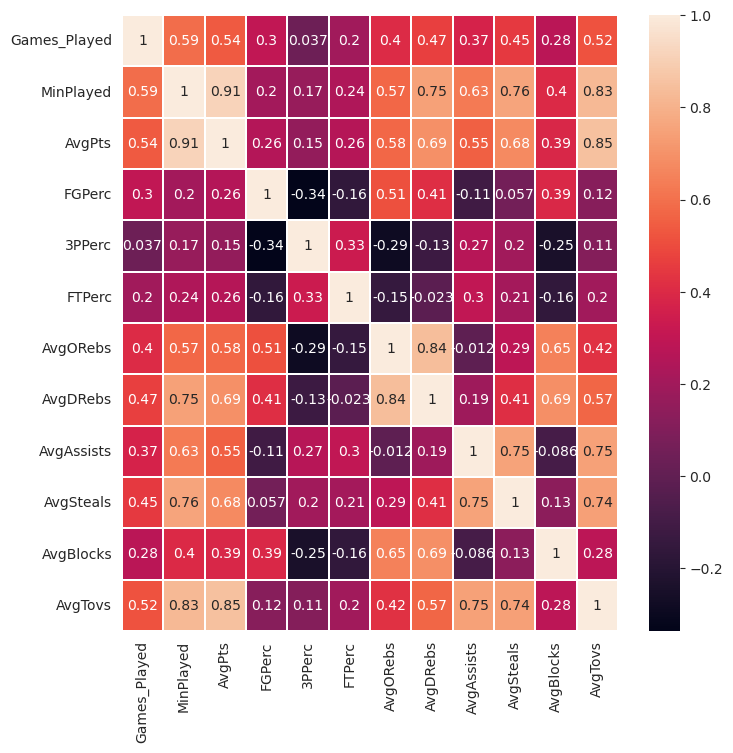

In [24]:
plt.figure(figsize=(8, 8))
sns.heatmap(cdf.corr(), annot=True, linewidths=.2)

0.628995160285591


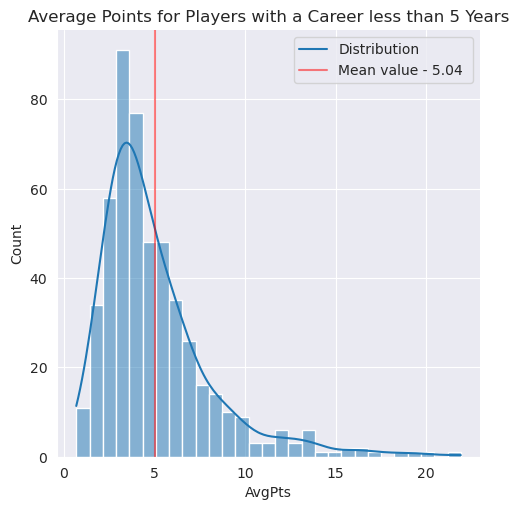

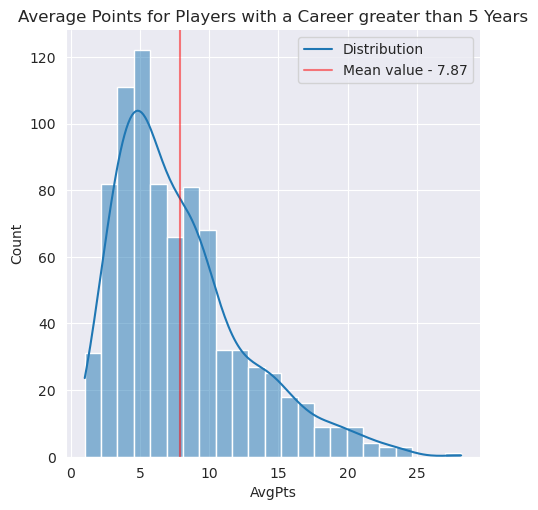

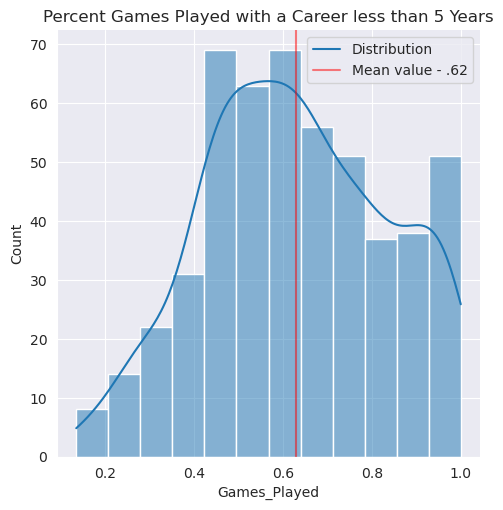

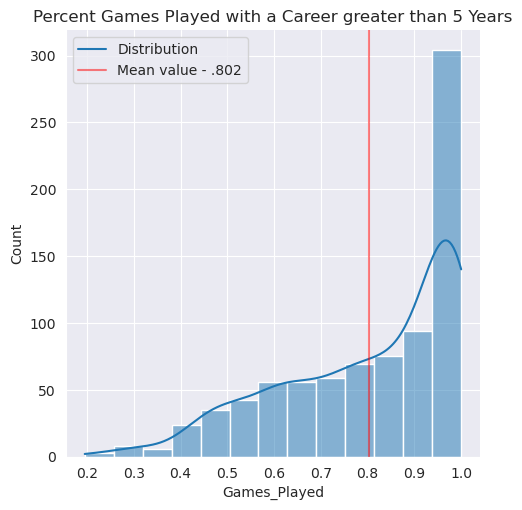

In [25]:
#histogram for avg.pts for under5
sns.displot(under5, x="AvgPts", kde=True)
plt.axvline(x = np.mean(under5['AvgPts']), linestyle = '-', alpha = .5, color = 'red')
plt.title('Average Points for Players with a Career less than 5 Years')
plt.legend(['Distribution','Mean value - 5.04 '])

#histogram for avg.pts for over5
sns.displot(over5, x="AvgPts", kde=True)
plt.axvline(x = np.mean(over5['AvgPts']), linestyle = '-', alpha = .5, color = 'red')
plt.title('Average Points for Players with a Career greater than 5 Years')
plt.legend(['Distribution','Mean value - 7.87'])

#Histogram for Games Played for under5
GPPerc1 = under5['Games_Played']/82
sns.displot(under5, x= GPPerc1, kde=True)
plt.axvline(x = np.mean(GPPerc1), linestyle = '-', alpha = .5, color = 'red')
plt.title('Percent Games Played with a Career less than 5 Years')
plt.legend(['Distribution','Mean value - .62'])
print(np.mean(GPPerc1))



#Histogram for Games Player over5
GPPerc2 = over5['Games_Played']/82
sns.displot(over5, x=GPPerc2, kde=True)
plt.axvline(x = np.mean(GPPerc2), linestyle = '-', alpha = .5, color = 'red')
plt.title('Percent Games Played with a Career greater than 5 Years')
plt.legend(['Distribution','Mean value - .802'])

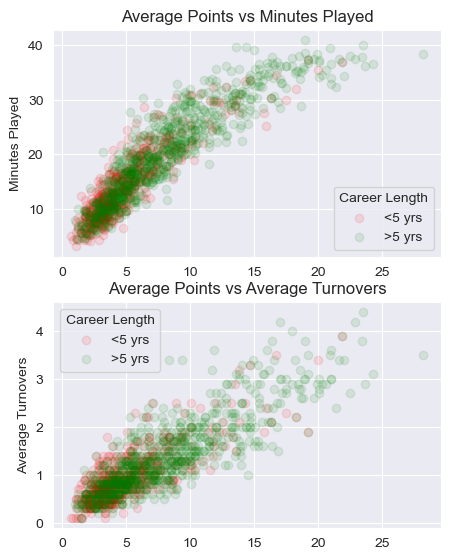

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 10))
sns.set_style("darkgrid")

#Avgpts vs Min Played     
plt.subplot(3,1,1)
plt.scatter(under5["AvgPts"], under5['MinPlayed'], color = 'red', alpha = .1)
plt.scatter(over5["AvgPts"], over5['MinPlayed'], color = 'green', alpha =.1)
plt.ylabel('Minutes Played')
plt.title('Average Points vs Minutes Played')
plt.legend(['<5 yrs', '>5 yrs'], title = 'Career Length')

#Avgpts vs Avg Tovs
plt.subplot(3,1,2)
plt.scatter(under5["AvgPts"], under5['AvgTovs'], color = 'red', alpha = .1)
plt.scatter(over5["AvgPts"], over5['AvgTovs'], color = 'green', alpha =.1)
plt.ylabel('Average Turnovers')
plt.title('Average Points vs Average Turnovers')
plt.legend(['<5 yrs', '>5 yrs'], title = 'Career Length')

## Discussion and Conclusion

##### Discussion 
As stated above, I found Games Played, Average Points, Minutes played, and average turnovers to be the most important factors in determing the career length of a rookie. For rookies that go on to have a career of less than 5 years, the IQR of games player is from .47-.78, with data that has a fairly normal distribution. For players that have a career greater than 5yrs, the IQR .66-.96, with data that is skewed left. This means that the most succesful players have data contained mostly from 66-96 percent of games played. We know the IQR of games played for rookies that go on to have a career of less than 5 years caps put at .78. **This means if a given player plays a percentage of .78 games or higher, they are very likely to have a career length greater than 5 years**

Next, the average points per game is also important. Both distributions are skewed right, but there are still important differences.For rookies that go on to have a career of less than 5 years, the IQR of average ponts scored is from 3.1 - 6.1. For rookies that go on to have a career length greater than 5 years, the IQR is .4.5-10 points. This means the most succesful players have average point scored from 4.5-10 points. We know the IQR of average points scored for rookies that go on to have a career of less than 5 years caps put at 6.1. **This means if a given players scores an average of 6.1 points per game or higher, they are very likely to have a career length greater than 5 years**

Additionally, the correlation matrix and graphss for Avg points vs Minutes played and Avg points vs Average turnovers show strong correlation between these factors and averag points per game. Becuase average points is an informative factor, these factors will probably be indicivate of career length as well. As avergae points increases, so does minutes played and average turnovers. **We can deduce that a player which is in the 75th percentile of average turnovers + minutes played will go on to have a career length greater than 5 years**

Next time, I would choose a dataset which contained a career length that was not a boolean. It is unfortunate that I couldn't compare players that were in the sport for 5 years to those that were in it for 10 or 15 years. 

The obstacles I ran into were the lack of data. I choose a dataset with redundant factors and little data so I can not be 100 percent sure about my results. I combined another dataset but I also felt my data was lacking. I would feel much more comfortable with my results if the dataset contained more points. 
 

### References

“Visualizing Distributions of Data#.” Visualizing Distributions of Data - Seaborn 0.13.0 Documentation, seaborn.pydata.org/tutorial/distributions.html. Accessed 3 Dec. 2023. 

Yakhyojon. “Basketball Players’ Career Duration.” Kaggle, 13 Oct. 2023, www.kaggle.com/datasets/yakhyojon/national-basketball-association-nba. 

Zach. “Seaborn: How to Create a Boxplot of Multiple Columns.” Statology, 30 Dec. 2021, www.statology.org/seaborn-boxplot-multiple-columns/. 